In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1CeuHe-yMRexmmzduDTq2mUcuVRY16wE8'}) # replace the id with id of file you want to access
downloaded.GetContentFile('train.csv') 

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dt=pd.read_csv("train.csv")

In [ ]:
dt.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


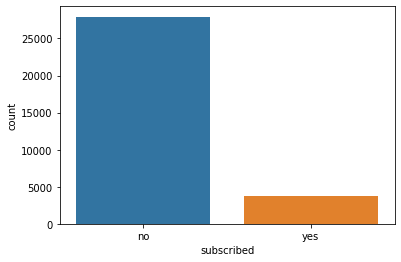

In [ ]:
import seaborn as sns
count_plt=sns.countplot(x='subscribed',data=dt)

In [ ]:
dt.groupby('job')['job'].count()

job
admin.           3631
blue-collar      6842
entrepreneur     1008
housemaid         874
management       6639
retired          1574
self-employed    1123
services         2903
student           635
technician       5307
unemployed        905
unknown           206
Name: job, dtype: int64

In [ ]:
dt.groupby('marital')['marital'].count()

marital
divorced     3630
married     19095
single       8922
Name: marital, dtype: int64

In [ ]:
dt.groupby('education')['education'].count()

education
primary       4808
secondary    16224
tertiary      9301
unknown       1314
Name: education, dtype: int64

In [ ]:
dt.groupby('default')['default'].count()

default
no     31062
yes      585
Name: default, dtype: int64

In [ ]:
dt.groupby('housing')['housing'].count()

housing
no     14063
yes    17584
Name: housing, dtype: int64

In [ ]:
dt.groupby('loan')['loan'].count()

loan
no     26516
yes     5131
Name: loan, dtype: int64

In [ ]:
dt.groupby('contact')['contact'].count()

contact
cellular     20423
telephone     2047
unknown       9177
Name: contact, dtype: int64

In [ ]:
dt.groupby('month')['month'].count()

month
apr    2055
aug    4333
dec     157
feb    1827
jan     977
jul    4844
jun    3738
mar     342
may    9669
nov    2783
oct     512
sep     410
Name: month, dtype: int64

In [ ]:
dt.groupby('poutcome')['poutcome'].count()

poutcome
failure     3362
other       1288
success     1068
unknown    25929
Name: poutcome, dtype: int64

In [ ]:
dt.groupby('subscribed')['subscribed'].count()

subscribed
no     27932
yes     3715
Name: subscribed, dtype: int64

In [ ]:
import pickle
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#loaded_tr_data=joblib.load("trans_tr_data.pkl")
#from google.colab import files
#files.download("trans_tr_data.pkl")
cleaned_tr_dt = drive.CreateFile({'id':'1W8HgYw0nu79hxh1J7Ebrg0M7XtLp11KY'}) # replace the id with id of file you want to access
cleaned_tr_dt.GetContentFile('trans_tr_data.pkl') 
#https://drive.google.com/file/d/1W8HgYw0nu79hxh1J7Ebrg0M7XtLp11KY/view?usp=sharing

In [ ]:
trans_data=joblib.load("trans_tr_data.pkl")

In [ ]:
trans_data

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,26110,56,1933,19,44,2,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,40576,31,3,20,91,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,15320,27,891,18,240,1,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,43962,57,3287,22,867,1,84,3,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,29842,31,119,4,380,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,0,12,116,2,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
31643,40178,53,380,5,438,2,-1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
31644,19710,32,312,7,37,3,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
31645,38556,57,225,15,22,7,337,12,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
fin_dt = drive.CreateFile({'id':'1DJz0dEcz85wP_g1frkri1NK0ewEjnY1z'}) # replace the id with id of file you want to access
fin_dt.GetContentFile('final_tran_dt.pkl') 

In [ ]:
fin_df=joblib.load("final_tran_dt.pkl")

In [ ]:
fin_df

,ID,age,balance,day,duration,campaign,pdays,previous,marital_le,default_le,housing_le,loan_le,contact_le,month_le,poutcome_le,subscribed_le,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,26110,56,1933,19,44,2,-1,0,1,0,0,0,1,9,3,0,1,0,0,0,0,0,0,0,0,0,0
1,40576,31,3,20,91,2,-1,0,1,0,0,0,0,5,3,0,0,0,0,0,0,0,0,0,0,0,0
2,15320,27,891,18,240,1,-1,0,1,0,1,0,0,5,3,0,0,0,0,0,0,0,0,1,0,0,0
3,43962,57,3287,22,867,1,84,3,0,0,0,0,0,6,2,1,0,0,0,0,1,0,0,0,0,0,0
4,29842,31,119,4,380,1,-1,0,1,0,1,0,0,3,3,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,0,12,116,2,-1,0,2,0,1,0,0,8,3,0,0,0,0,0,1,0,0,0,0,0,0
31643,40178,53,380,5,438,2,-1,0,0,0,0,1,0,6,3,1,0,0,0,0,1,0,0,0,0,0,0
31644,19710,32,312,7,37,3,-1,0,2,0,0,0,0,1,3,0,0,0,0,0,1,0,0,0,0,0,0
31645,38556,57,225,15,22,7,337,12,1,0,1,0,1,8,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

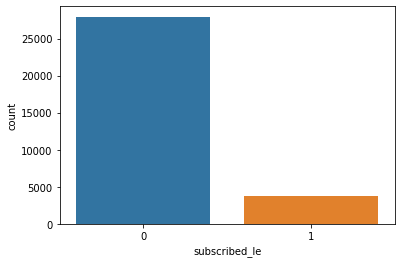

In [ ]:
count_plt=sns.countplot(x='subscribed_le',data=fin_df)

In [ ]:
c_relation=fin_df.corr()

In [ ]:
c_relation

,ID,age,balance,day,duration,campaign,pdays,previous,marital_le,default_le,housing_le,loan_le,contact_le,month_le,poutcome_le,subscribed_le,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.086454,-0.051521,-0.180047,-0.086140,-0.723830,-0.165274,-0.443429,0.296663,0.018790,-0.121656,-0.023663,-0.010610,0.055344,0.085450,0.015529,-0.043359,0.121191,-0.005939,0.023865
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,-0.406024,-0.016117,-0.183775,-0.012657,0.026733,-0.038368,0.006466,0.024538,-0.055530,-0.046797,0.023492,0.090892,-0.021578,0.444928,-0.010433,-0.067485,-0.192511,-0.068517,-0.000898
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.003487,-0.069422,-0.067466,-0.083631,-0.024083,0.023056,-0.019629,0.050807,-0.030051,-0.051048,0.010833,0.005893,0.066619,0.049422,0.021339,-0.035848,0.002282,-0.015775,0.007583
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.007686,0.009996,-0.025666,0.014769,-0.027046,-0.000604,0.077586,-0.029600,-0.012114,-0.017137,-0.001104,0.005731,0.015577,-0.018080,0.004502,-0.001764,-0.014934,0.030681,-0.005324
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.011544,-0.010849,0.003021,-0.012781,-0.016503,0.005943,0.009771,0.389838,-0.012764,0.008423,-0.006705,-0.011864,-0.003185,0.029160,0.008396,-0.001233,-0.005475,-0.011540,0.018208
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.009394,0.018538,-0.021076,0.009340,0.022666,-0.105428,0.100720,-0.070607,-0.019145,0.011835,0.008332,0.003330,0.014295,-0.035999,0.006315,-0.002630,-0.021944,0.015875,-0.018994
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.019741,-0.029622,0.118790,-0.020078,-0.245076,0.027576,-0.857716,0.108290,0.032793,0.014206,-0.018808,-0.026654,-0.012731,-0.001441,-0.006090,0.008005,0.026806,-0.012299,-0.015138
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.012717,-0.015877,0.034231,-0.009258,-0.141098,0.020107,-0.463034,0.088081,0.016241,-0.017275,-0.005487,-0.014559,0.016127,0.009186,0.000712,-0.010670,0.020403,-0.000896,-0.014065
marital_le,0.086454,-0.406024,0.003487,-0.007686,0.011544,-0.009394,0.019741,0.012717,1.000000,-0.009591,-0.017846,-0.041654,-0.040180,-0.003834,-0.019770,0.046043,0.007483,-0.030483,-0.038395,-0.054988,0.018895,-0.115671,0.005967,-0.001882,0.180675,0.042565,0.009263
default_le,-0.051521,-0.016117,-0.069422,0.009996,-0.010849,0.018538,-0.029622,-0.015877,-0.009591,1.000000,-0.011823,0.081567,0.014053,0.004694,0.035067,-0.020168,-0.007449,0.005998,0.027208,0.002640,-0.003297,-0.011973,0.005378,-0.001351,-0.014619,-0.001947,0.007419


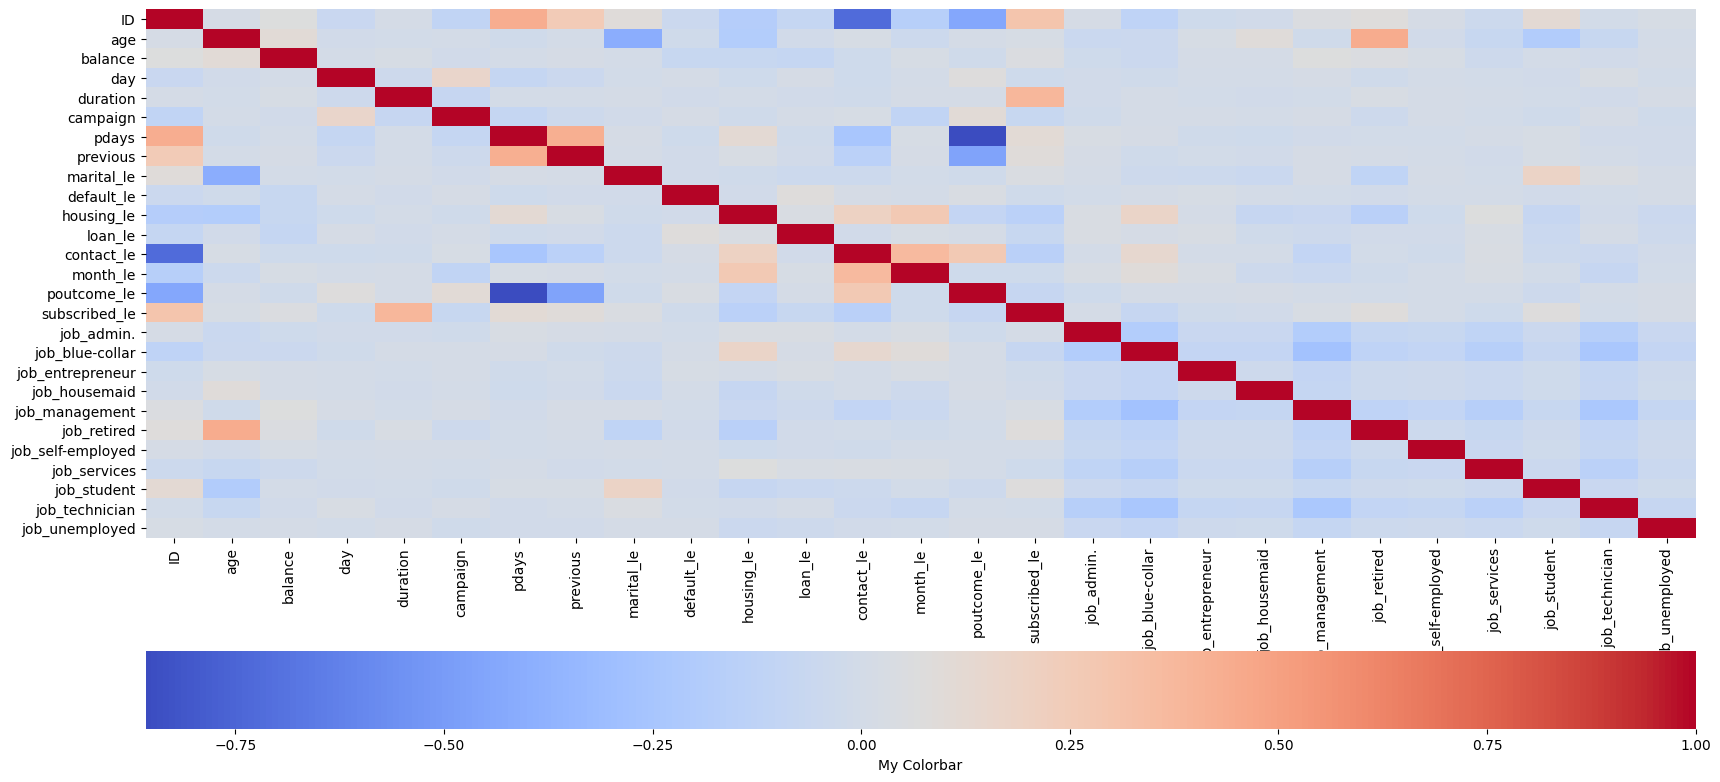

In [ ]:
plt.figure(figsize=(20,10),dpi=100)
#ht_map=sns.heatmap(c_relation,cmap='coolwarm',annot=True)
ht_map=sns.heatmap(c_relation,cmap='coolwarm',cbar_kws={'label': 'My Colorbar', 'orientation': 'horizontal'})

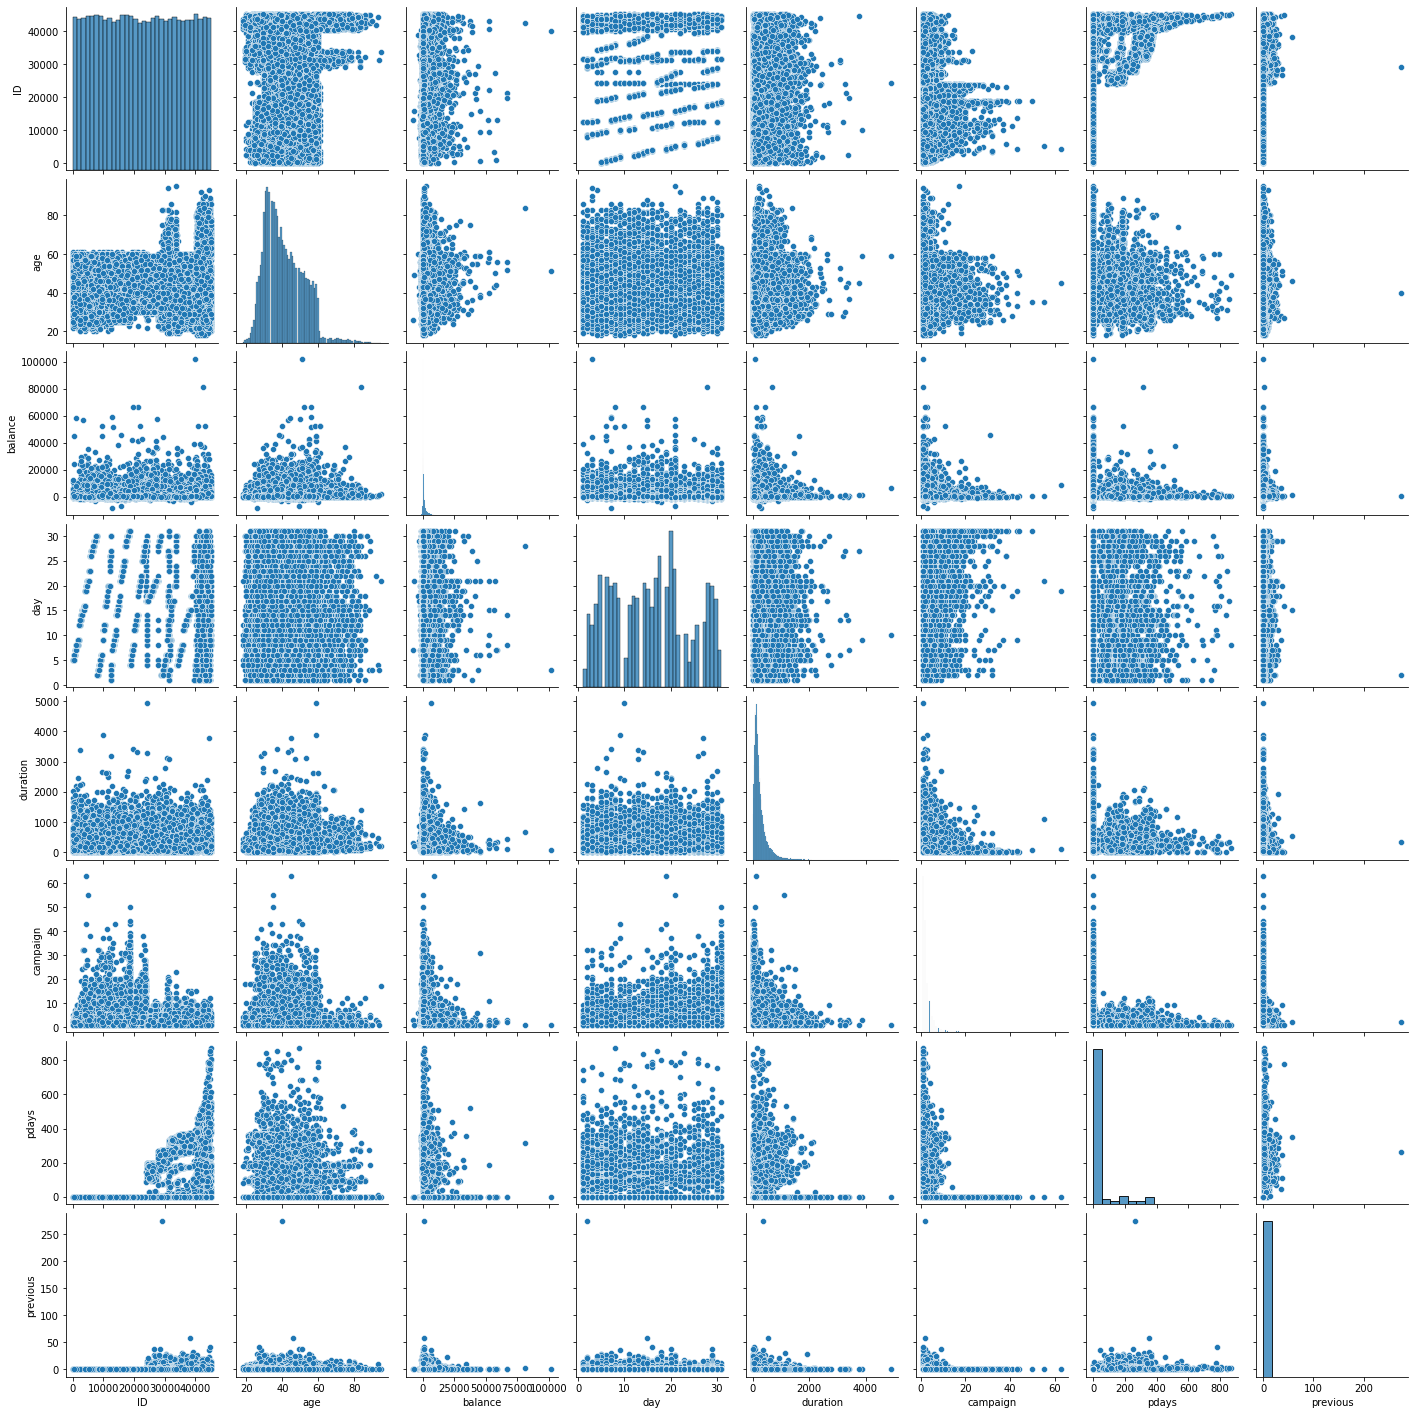

In [ ]:
pair_plot=sns.pairplot(dt)